In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import random
import os

import torchvision.transforms

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [67]:
transform_pipe = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(), # Convert np array to PILImage
    
    # Resize image to 224 x 224 as required by most vision models
    torchvision.transforms.RandomCrop(size=(300, 300)),
    
    torchvision.transforms.RandomHorizontalFlip(0.5),
    
    torchvision.transforms.RandomVerticalFlip(0.5),
    
    # Convert PIL image to tensor with image values in [0, 1]
    torchvision.transforms.ToTensor()
    
    
])

In [95]:
class CustomDataset(Dataset):
    
    def __init__(self, img_list, anno_list, num_of_classes=2, transform=None):
        
        self.img_list = img_list
        self.anno_list = anno_list
        self.num_of_classes = num_of_classes
        self.transform = transform
        
        
    def __getitem__(self, img_id):
        
        images = []
        # Get random image
        rand_int = random.randint(0, len(self.img_list))
        image = Image.open(img_list[rand_int])
        img = np.array(image)
        images.append(img)
        anno = np.array(Image.open(self.anno_list[rand_int]).convert("L"))

        anno[anno > 0] = 1
        anno_reshaped = np.zeros((anno.shape[0], anno.shape[1], self.num_of_classes))
        
        if self.transform:
            # https://github.com/pytorch/vision/issues/9 - transforming both label and image
            img = self.transform(img)
            anno = self.transform(anno)
        
        #sample = {"image": image, "label": self.labels['label'][img_id]}
        sample = {"image": img, "annotation": anno}
        return sample
    
    
    def __len__(self):
        return len(self.img_list)

In [96]:
path_to_images = 'data/train/raw_images'
path_to_annotations = 'data/train/annotations_white'



In [97]:
img_list = glob.glob(path_to_images + os.sep + "*.bmp")
img_list = sorted(img_list)
anno_list = glob.glob(path_to_annotations + os.sep + "*.bmp")
anno_list = sorted(anno_list)

dataset_train = CustomDataset(img_list, anno_list, 2, transform=transform_pipe)

In [98]:
dataloader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size = 1,
)

In [99]:
for batch_num, batch_data in enumerate(dataloader_train):
    fig_img = plt.figure()
    #print(batch_data['image'].numpy().shape)
    plt.imshow(batch_data['image'].permute(1, 2, 0).numpy().numpy())
    fig_img.suptitle('image')
    plt.show()
    break

IndexError: tuple index out of range

In [106]:
images = []
num_of_classes = 2
rand_int = random.randint(0, len(img_list))
image = Image.open(img_list[rand_int])
img = np.array(image)
images.append(img)
anno = np.array(Image.open(anno_list[rand_int]).convert("L"))

anno[anno > 0] = 1
anno_reshaped = np.zeros((anno.shape[0], anno.shape[1], num_of_classes))

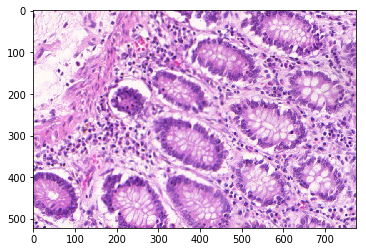

In [115]:
plt.imshow(img)
fig_img.suptitle('image')
plt.show()

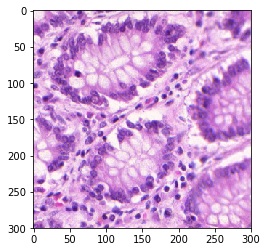

In [120]:
plt.imshow(transform_pipe(img).permute(1, 2, 0).numpy())
fig_img.suptitle('image')
plt.show()